In [25]:
import pandas as pd
file_path="list.xlsx"

df=pd.read_excel(file_path)


In [26]:
df.head()

,Age,Have Diabates
0,22,0
1,26,0
2,39,1
3,21,0
4,25,0


In [27]:
x=df[['Age']]
y=df['Have Diabates']
x

,Age
0,22
1,26
2,39
3,21
4,25
5,40
6,46
7,28
8,33
9,24


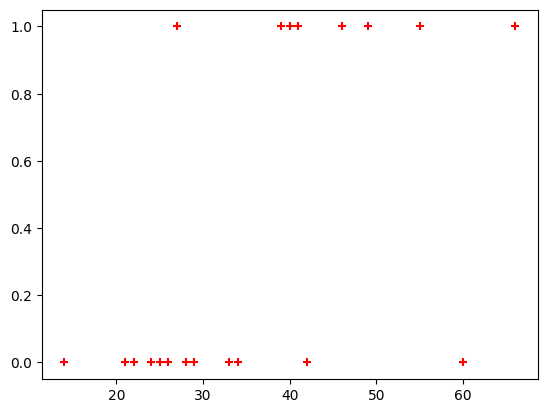

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Have Diabates'], marker='+', color='red')

In [29]:
df.shape

(20, 2)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["Age"]], df["Have Diabates"], test_size=0.2, random_state=42
)

In [32]:
X_train

,Age
8,33
5,40
11,49
3,21
18,60
16,14
13,55
2,39
9,24
19,34


In [33]:
X_test

,Age
0,22
17,66
15,42
1,26


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
model.predict(X_test)

array([0, 1, 1, 0])

In [38]:
model.score(X_test, y_test)

0.75

In [39]:
model.predict_proba(X_test)

array([[0.84220832, 0.15779168],
       [0.05278182, 0.94721818],
       [0.40156786, 0.59843214],
       [0.77902853, 0.22097147]])

In [40]:
model.predict([[65]])

c:\Users\mbaun\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [41]:
y_pred=model.predict(X_test)

In [47]:
results = pd.DataFrame({
    'Age': X_test['Age'].values,
    'Actual_Diabetes': y_test.values,
    'Predicted_Diabetes': y_pred
})

results

,Age,Actual_Diabetes,Predicted_Diabetes
0,22,0,0
1,66,1,1
2,42,0,1
3,26,0,0


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.75

In [44]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[2 1]
 [0 1]]


In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

